In [374]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [274]:
def sumar_ganancias_repetidas(df):
    duplicated_index = df[df.index.duplicated()].index
    duplicated = df[df.index.duplicated(keep=False)]
    df = df.drop(duplicated_index, axis = 0)
    # print("Fechas repetidas: ", duplicated_index.values)
    for i in duplicated_index:
        suma_ganancia = duplicated.loc[i]['Ganancia'].sum()
        append_row = duplicated.loc[i].iloc[0]
        append_row['Ganancia'] = suma_ganancia
        df.append(append_row)
        
        
    return df

In [165]:
data = pd.read_excel('Registro_Excel.xlsx')
data.head()
print(data.shape)

(282, 10)


In [166]:
data = data.drop("Unnamed: 0", axis=1)
data['Ganancia'] = data['Ganancia'].astype(str)

In [167]:
ganancia = data[data['Ganancia'].str.isnumeric()]
ganancia['Ganancia'] = pd.to_numeric(ganancia['Ganancia']).astype('float')
ganancia = ganancia[ ganancia['Ganancia'] != 0 ]
ganancia['Fecha'] = pd.to_datetime(ganancia['Fecha'].dt.date.astype(str), format='%Y-%m-%d', utc=False)
ganancia = ganancia.set_index('Fecha')
ganancia['Mes'] = ganancia.index.month
ganancia['Dia'] = ganancia.index.day
ganancia['Dia Semana'] = ganancia.index.weekday_name
Andres
print(ganancia.shape)
print(ganancia.dtypes)
ganancia.head()

(68, 11)
Usuario         object
Bet365(COP)    float64
Wplay          float64
Codere         float64
Rushbet        float64
Retiros        float64
Total          float64
Ganancia       float64
Mes              int64
Dia              int64
Dia Semana      object
dtype: object


C:\Users\andres\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Usuario,Bet365(COP),Wplay,Codere,Rushbet,Retiros,Total,Ganancia,Mes,Dia,Dia Semana
Fecha,,,,,,,,,,,
2019-12-22,Esteban SM,479402.0,711500.0,0.0,0.0,0.0,1190902.0,246359.0,12,22,Sunday
2019-12-22,Yusbay MD,0.0,1108000.0,0.0,0.0,0.0,1108000.0,64377.0,12,22,Sunday
2019-12-22,Esteban SM,0.0,739000.0,0.0,0.0,0.0,739000.0,62649.0,12,22,Sunday
2019-12-21,Yusbay MD,360738.0,863000.0,0.0,0.0,0.0,1223738.0,488240.0,12,21,Saturday
2019-12-19,Yusbay MD,453603.0,176938.0,0.0,0.0,0.0,630541.0,128056.0,12,19,Thursday


In [168]:
Yusbay = ganancia[ganancia['Usuario']=='Yusbay MD']
Esteban = ganancia[ganancia['Usuario']=='Esteban SM']
Andres = ganancia[ganancia['Usuario']=='Andres JG']

In [169]:
Esteban = sumar_ganancias_repetidas(Esteban)
Andres = sumar_ganancias_repetidas(Andres)
Yusbay = sumar_ganancias_repetidas(Yusbay)

,Usuario,Bet365(COP),Wplay,Codere,Rushbet,Retiros,Total,Ganancia,Mes,Dia,Dia Semana
Fecha,,,,,,,,,,,
2019-12-19,Andres JG,571383.0,131288.0,0.0,0.0,0.0,702671.0,146988.0,12,19,Thursday
2019-12-18,Andres JG,470441.0,322283.0,0.0,0.0,0.0,792724.0,71395.0,12,18,Wednesday
2019-12-17,Andres JG,848462.0,0.0,0.0,0.0,0.0,848462.0,120034.0,12,17,Tuesday
2019-12-16,Andres JG,427793.0,262409.0,0.0,0.0,0.0,690202.0,40298.0,12,16,Monday
2019-12-11,Andres JG,512252.0,0.0,0.0,331090.0,0.0,843342.0,70127.0,12,11,Wednesday


In [283]:
Andres.shape

(20, 11)

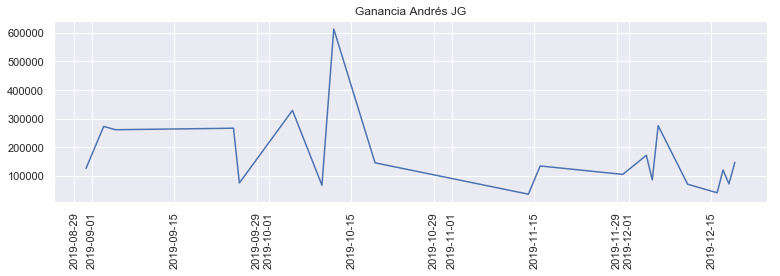

In [300]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

fig, ax = plt.subplots()
ax.plot_date(Andres.index, Andres['Ganancia'], marker='', linestyle='-')
ax.set_title('Ganancia')
plt.title('Ganancia Andrés JG')

plt.xticks(rotation=90)
fig.tight_layout()
plt.show()

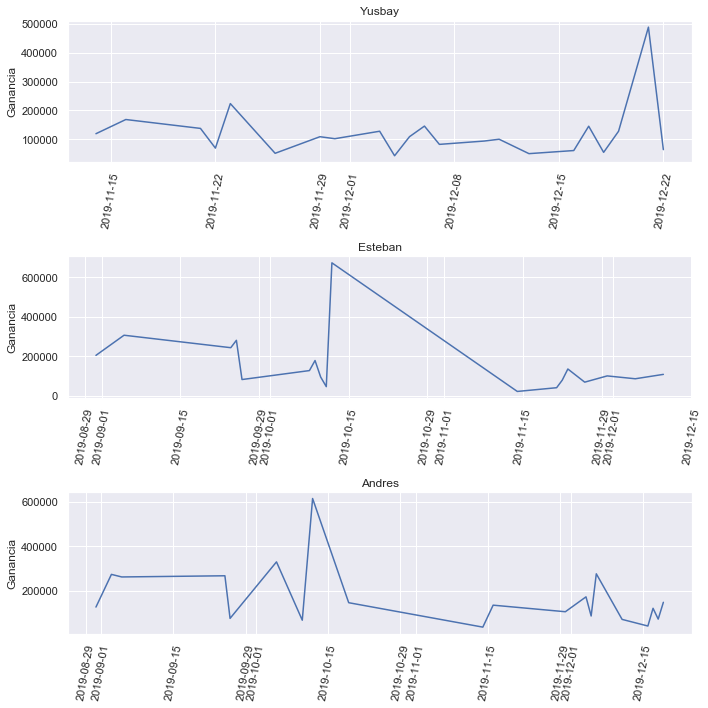

In [441]:
sujetos = ['Yusbay', 'Esteban', 'Andres']
df = [Yusbay, Esteban, Andres]
fig = plt.figure(figsize=(10,10))
for i in range(3):
    ax1 = fig.add_subplot(311+i)
    plt.xticks(rotation=80)
    plt.plot(df[i].index, df[i]['Ganancia']);
    ax1.set_title(sujetos[i])
    ax1.set_ylabel('Ganancia')
    fig.tight_layout()
    
plt.show()
fig.savefig('img/historico_ganancias.pdf', dpi = 100)

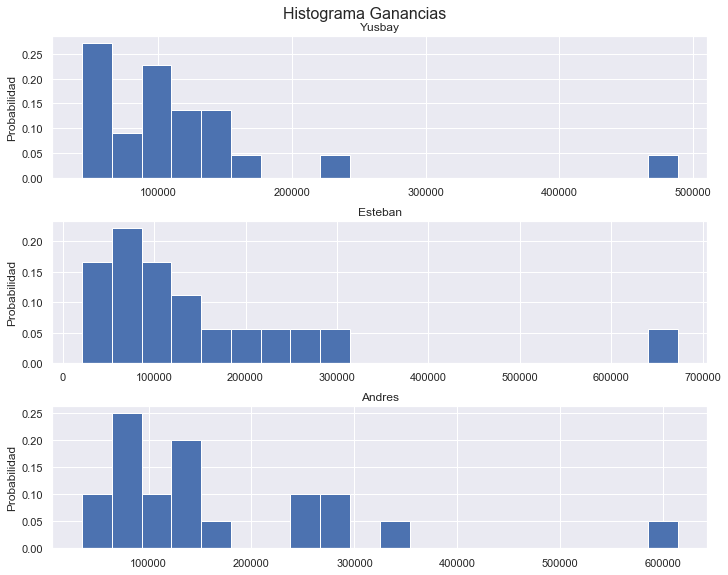

In [443]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 8), constrained_layout=True)
fig.suptitle('Histograma Ganancias', fontsize=16)
for i in range(3):
    a = df[i]['Ganancia']
    axs[i].hist(a, weights = np.ones_like(a)/len(a), bins=20);
    axs[i].set_title(sujetos[i])
    axs[i].set_ylabel('Probabilidad')

plt.show()
fig.savefig('img/histograma_ganancias.pdf', dpi = 100)

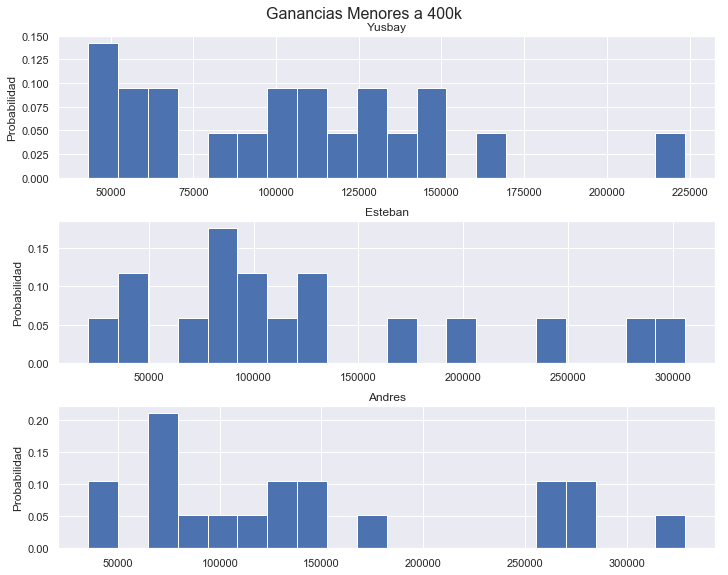

In [448]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 8), constrained_layout=True)
fig.suptitle('Ganancias Menores a 400k', fontsize=16)
for i in range(3):
    a = df[i][df[i]['Ganancia'] < 400000]['Ganancia']
    axs[i].hist(a, weights = np.ones_like(a)/len(a), bins=20);
    axs[i].set_title(sujetos[i])
    axs[i].set_ylabel('Probabilidad')

plt.show()
fig.savefig('img/histograma_ganancias_men_400k.pdf', dpi = 600)

ValueError: weights should have the same shape as x

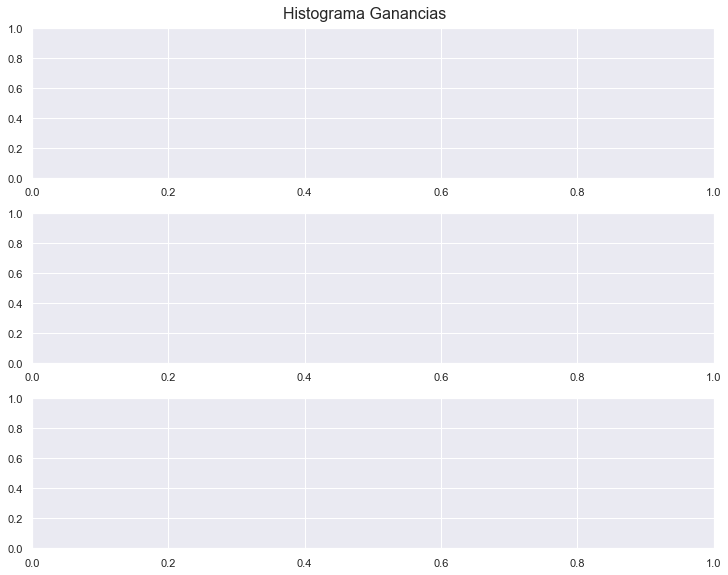

In [455]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 8), constrained_layout=True)
fig.suptitle('Histograma Ganancias', fontsize=16)
for i in range(3):
    a = df[i]['Ganancia']
    axs[i].hist(a, weights = df[i]['Dia Semana'], bins=20);
    axs[i].set_title(sujetos[i])
    axs[i].set_ylabel('Probabilidad')

plt.show()
fig.savefig('img/histograma_ganancias.pdf', dpi = 100)

TypeError: Empty 'DataFrame': no numeric data to plot